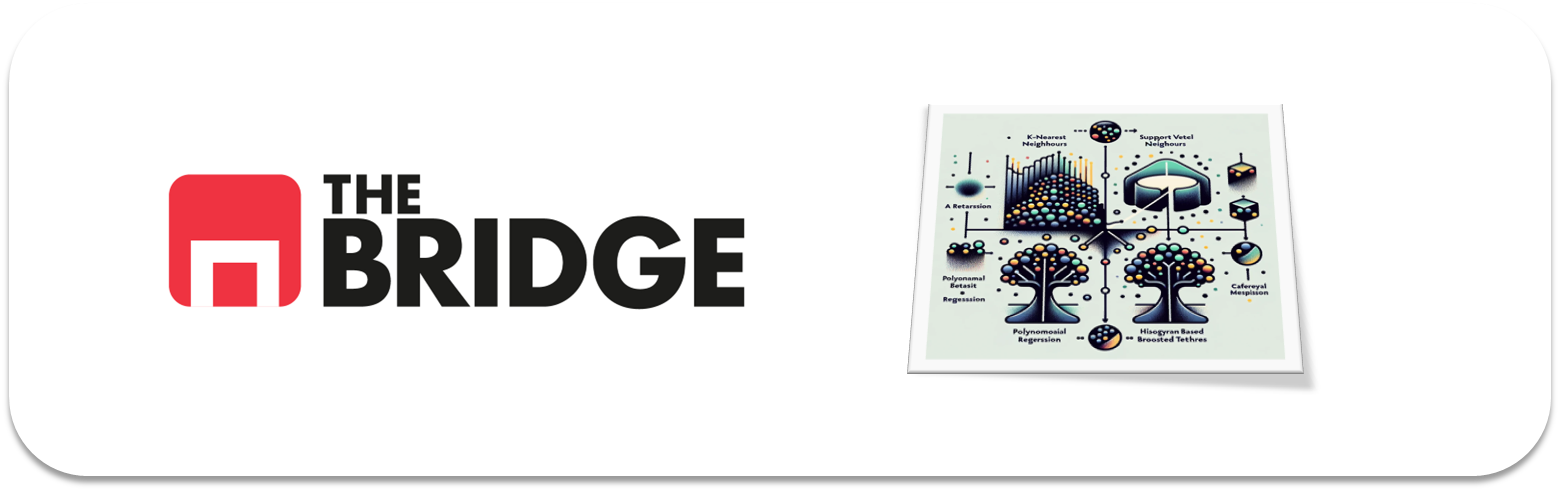

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [20]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [21]:
df = pd.read_csv("./data/credit_npo.csv")

In [22]:
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [24]:
def describe_df(df):
    tipos = df.dtypes
    nulos_porcentaje = df.isnull().mean() * 100
    unicos = df.nunique()
    cardinalidad_porcentaje = unicos / len(df) * 100

    df_describe = pd.DataFrame({
        "Tipo": tipos,
        "Porcentaje_Nulos": nulos_porcentaje,
        "Valores_Unicos": unicos,
        "Porcentaje_Cardinalidad": cardinalidad_porcentaje
    })
    return df_describe

In [25]:
describe_df(df)

,Tipo,Porcentaje_Nulos,Valores_Unicos,Porcentaje_Cardinalidad
SeriousDlqin2yrs,int64,0.000000,2,0.015953
RevolvingUtilizationOfUnsecuredLines,float64,0.000000,10764,85.857861
age,int64,0.000000,78,0.622158
NumberOfTime30-59DaysPastDueNotWorse,int64,0.000000,10,0.079764
DebtRatio,float64,0.000000,11547,92.103374
MonthlyIncome,float64,5.750977,4167,33.237617
NumberOfOpenCreditLinesAndLoans,int64,0.000000,43,0.342985
NumberOfTimes90DaysLate,int64,0.000000,13,0.103693
NumberRealEstateLoansOrLines,int64,0.000000,16,0.127622
NumberOfTime60-89DaysPastDueNotWorse,int64,0.000000,8,0.063811


- SeriousDlqin2yrs: Es una variable binaria, ya que tiene dos valores distintos (0 y 1), que indican si ha ocurrido un incumplimiento de pago o no.
- RevolvingUtilizationOfUnsecuredLines: Parece ser una variable numérica continua, que representa el porcentaje del límite de crédito utilizado.
- age: Variable numérica continua que representa la edad del cliente.
- NumberOfTime30-59DaysPastDueNotWorse / NumberOfTime60-89DaysPastDueNotWorse / NumberOfTimes90DaysLate: Éstas tres parecen ser variables numéricas discretas que representan el número de veces que el cliente ha retrasado los pagos en diferentes períodos de tiempo.
- DebtRatio: Variable numérica continua que representa la relación entre la deuda y los ingresos del cliente.
- MonthlyIncome: Variable numérica continua que representa los ingresos mensuales del cliente.
- NumberOfOpenCreditLinesAndLoans: Variable numérica discreta que representa el número de líneas de crédito abiertas y préstamos.
- NumberRealEstateLoansOrLines: Variable numérica discreta que representa el número de préstamos o líneas de crédito respaldados por bienes raíces.
- NumberOfDependents: Variable numérica discreta que representa el número de personas que dependen del cliente.

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Éstamos tratanto un problema de clasificación supervisado donde la variable target es "SeriousDlqin2yrs"

In [26]:
target = "SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [27]:
df[target].value_counts()

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

<Axes: xlabel='SeriousDlqin2yrs', ylabel='percent'>

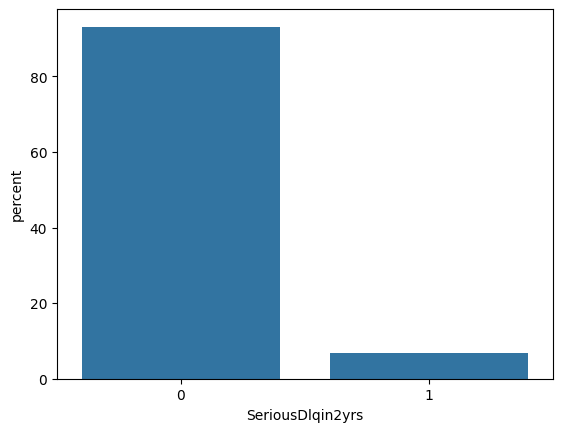

In [28]:
sns.countplot(df, x= target, stat= "percent")

- La variable target ésta muy desbalanceada a favor de 0, dependiendo de lo que nos pidan tendremos que intenar equilibrar el dataset para mejorar la predicción de nuestros modelos.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

- Voy a eliminar las filas con nulos de "NumberOfDependents" porque son pocas filas y tengo un dataset con bastantes datos. 

In [29]:
df = df.dropna(subset=["NumberOfDependents"])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12360 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12360 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12360 non-null  float64
 2   age                                   12360 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12360 non-null  int64  
 4   DebtRatio                             12360 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12360 non-null  int64  
 7   NumberOfTimes90DaysLate               12360 non-null  int64  
 8   NumberRealEstateLoansOrLines          12360 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12360 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), int64

In [32]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 73)

**MINI EDA**

In [33]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9888 entries, 11252 to 5093
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9888 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9888 non-null   float64
 2   age                                   9888 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9888 non-null   int64  
 4   DebtRatio                             9888 non-null   float64
 5   MonthlyIncome                         9449 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9888 non-null   int64  
 7   NumberOfTimes90DaysLate               9888 non-null   int64  
 8   NumberRealEstateLoansOrLines          9888 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9888 non-null   int64  
 10  NumberOfDependents                    9888 non-null   float64
dtypes: float64(4), int

In [34]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,9888.0,0.070793,0.256492,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,9888.0,0.332623,0.370666,0.0,0.030792,0.165837,0.585976,6.0
age,9888.0,51.941242,14.961617,21.0,41.000000,51.000000,62.000000,97.0
NumberOfTime30-59DaysPastDueNotWorse,9888.0,0.403519,3.987666,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,9888.0,1.631538,8.400169,0.0,0.142995,0.301279,0.498158,99.0
MonthlyIncome,9449.0,6816.318129,10223.910180,0.0,3478.000000,5416.000000,8300.000000,629000.0
NumberOfOpenCreditLinesAndLoans,9888.0,8.546824,5.168001,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,9888.0,0.256675,3.968784,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,9888.0,1.006978,1.134458,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,9888.0,0.224009,3.950882,0.0,0.000000,0.000000,0.000000,98.0


In [35]:
#Voy a imputarle la media a los valores nulos de "MonthlyIncome"
media_monthly = train_set["MonthlyIncome"].mean()
train_set["MonthlyIncome"].fillna(media_monthly, inplace = True)

In [36]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9888 entries, 11252 to 5093
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9888 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9888 non-null   float64
 2   age                                   9888 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9888 non-null   int64  
 4   DebtRatio                             9888 non-null   float64
 5   MonthlyIncome                         9888 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9888 non-null   int64  
 7   NumberOfTimes90DaysLate               9888 non-null   int64  
 8   NumberRealEstateLoansOrLines          9888 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9888 non-null   int64  
 10  NumberOfDependents                    9888 non-null   float64
dtypes: float64(4), int

In [37]:
features_num = train_set.columns.tolist()
features_num.pop(0)
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [38]:
train_set.corr(numeric_only=True)[target].sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.279269
NumberOfTimes90DaysLate                 0.110221
NumberOfTime30-59DaysPastDueNotWorse    0.108533
NumberOfTime60-89DaysPastDueNotWorse    0.088150
NumberOfDependents                      0.042451
NumberRealEstateLoansOrLines           -0.003436
DebtRatio                              -0.015545
MonthlyIncome                          -0.027882
NumberOfOpenCreditLinesAndLoans        -0.040652
age                                    -0.119970
Name: SeriousDlqin2yrs, dtype: float64

<Axes: >

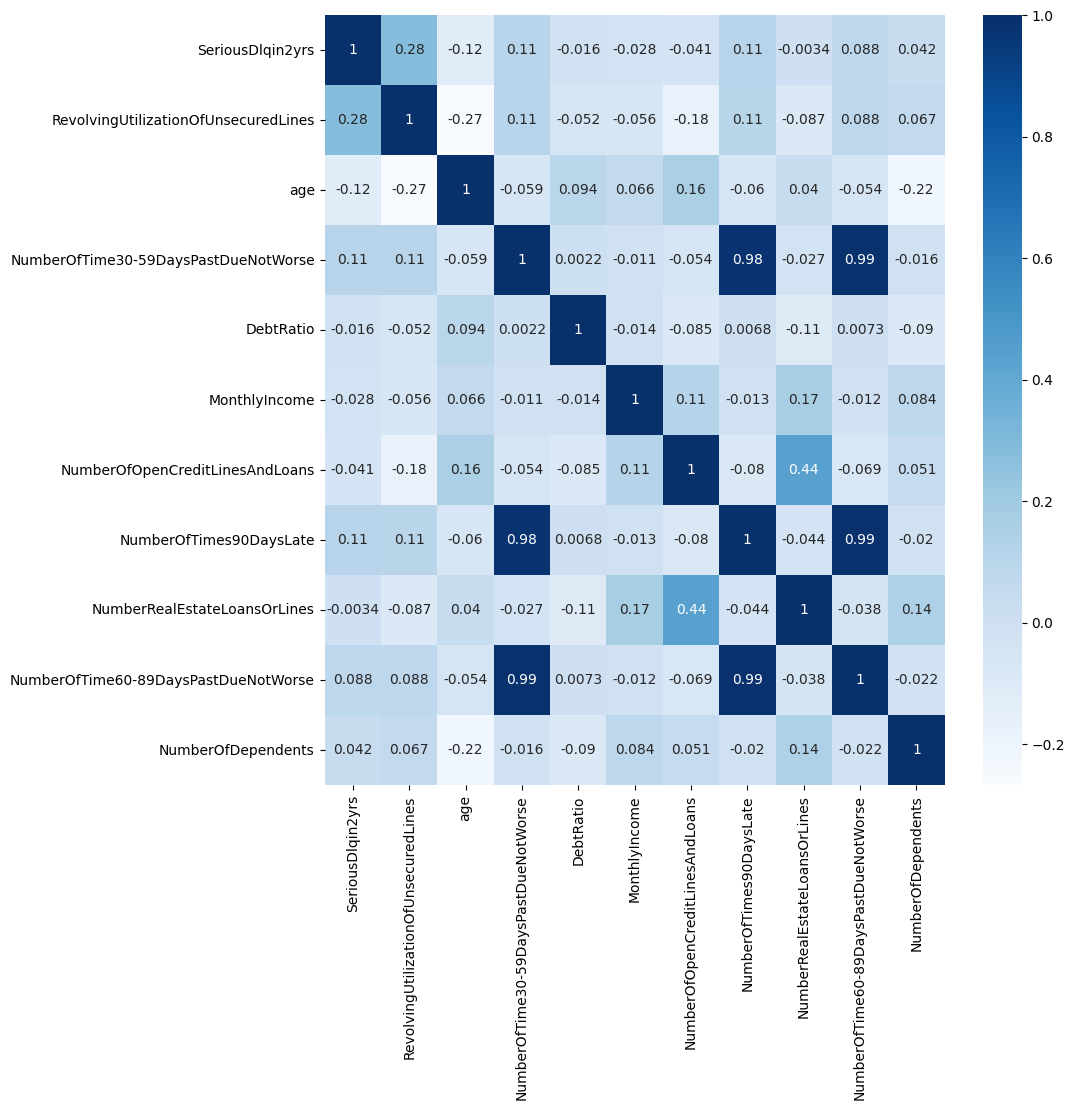

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(numeric_only=True), annot= True, cmap = "Blues")

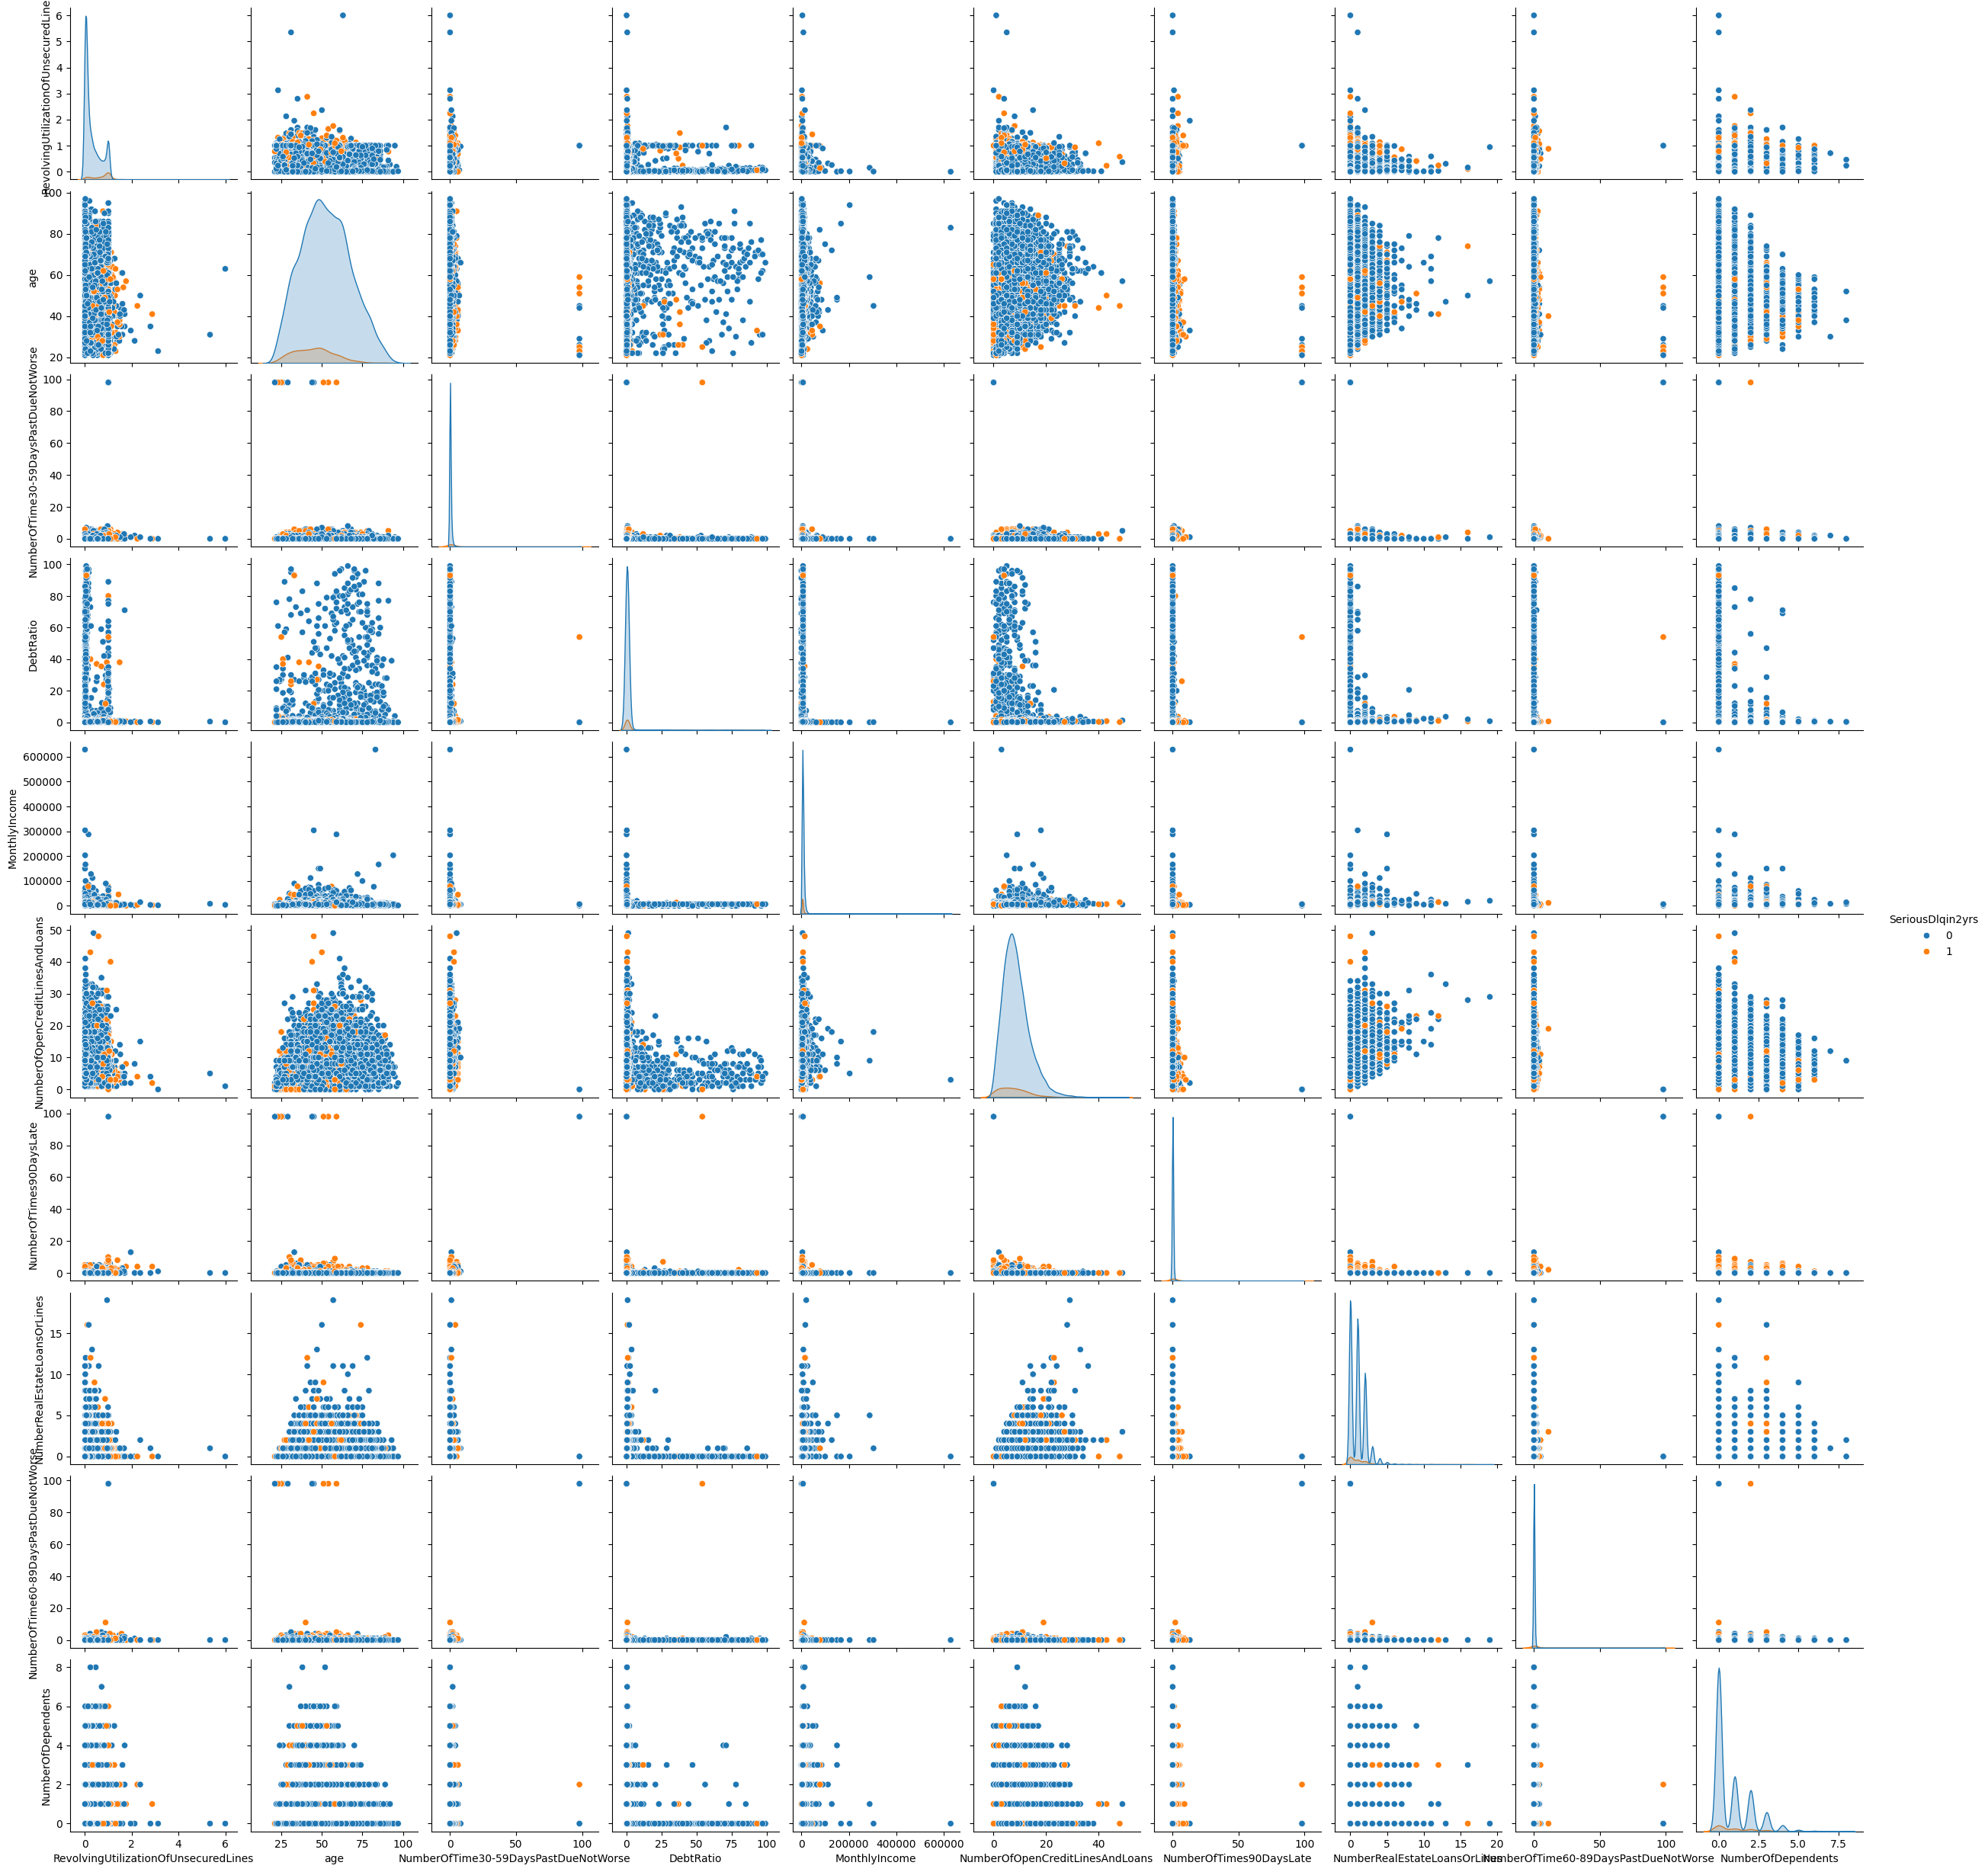

In [40]:
sns.pairplot(train_set, hue = target)

In [41]:
def histograma_bivariante(df, columna_num, columna_cat):
    """
    Función que pinta los histogramas de una variable numérica y una varible categórica 
    para realizar un análisis bivariante
    """
    plt.figure(figsize=(6, 4))
    sns.histplot(data = df, x= columna_num, hue = columna_cat, kde = True, palette= "cool")
    

    plt.title(f'Análisis Bivariante entre {columna_num} y {columna_cat}')
    plt.xlabel(columna_num)
    plt.show()

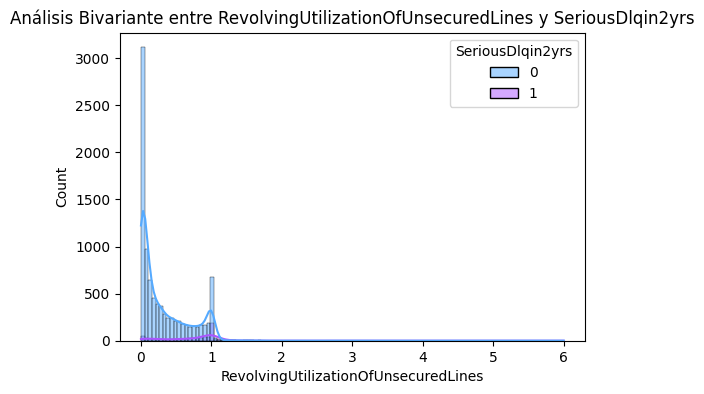

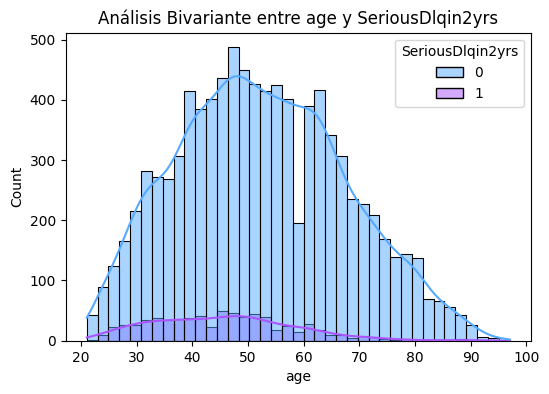

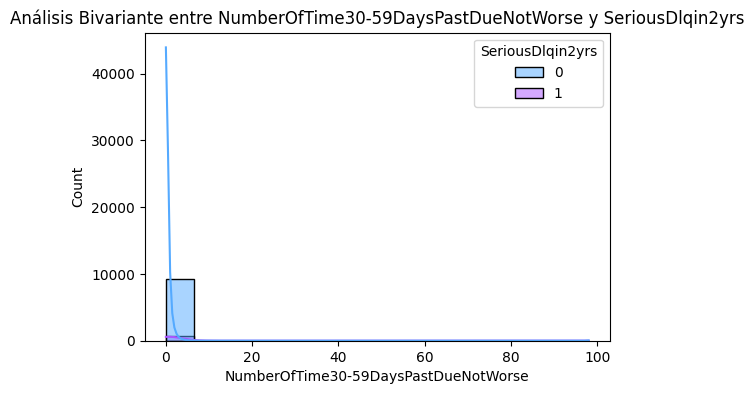

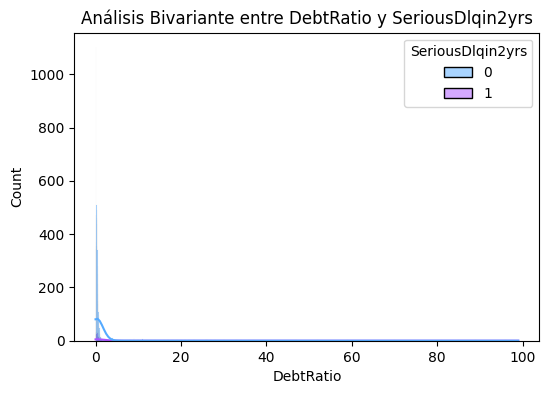

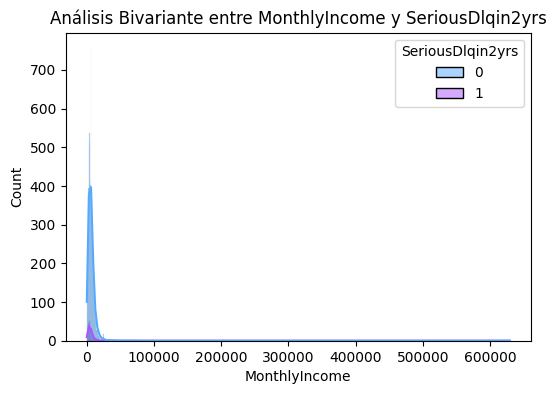

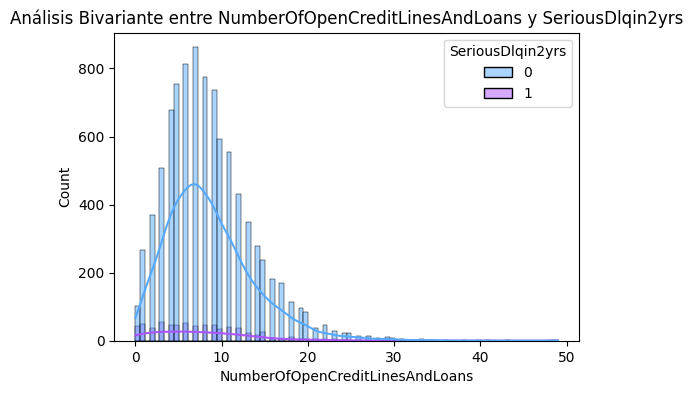

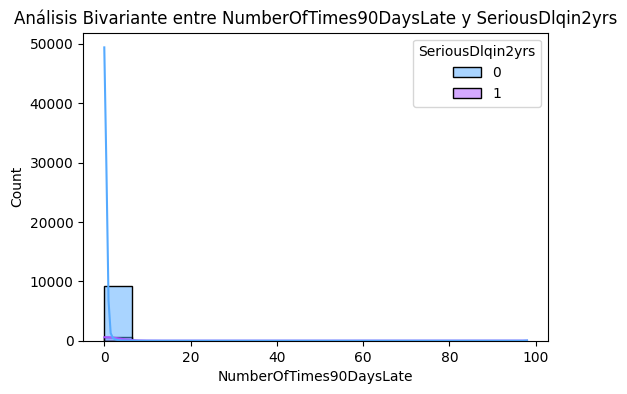

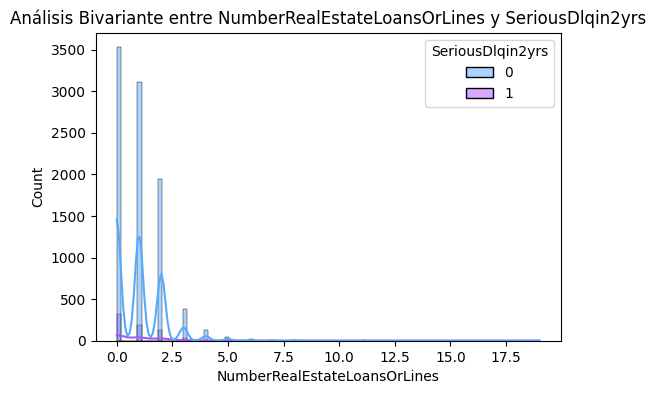

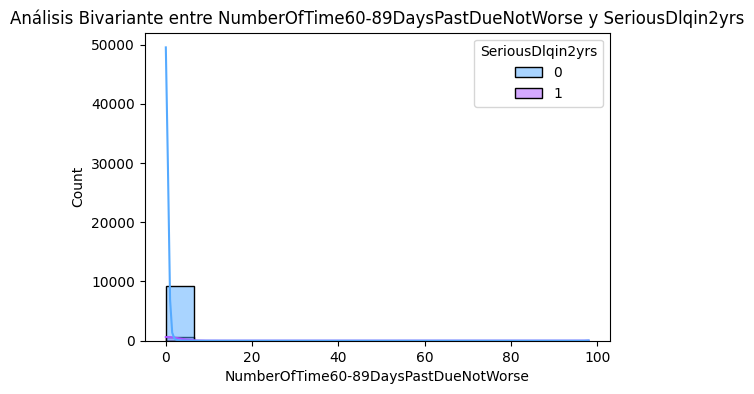

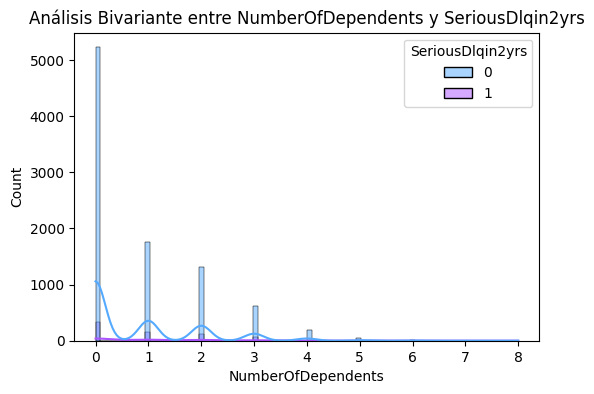

In [42]:
for feat in features_num:
    histograma_bivariante(train_set, feat,target)

- Voy a mirar las distribuciones de "NumberOfDependents" y NumberRealEstateLoansOrLines" porque al ser númerica continuas creo que se aprecía mejor

<Axes: xlabel='NumberOfDependents', ylabel='percent'>

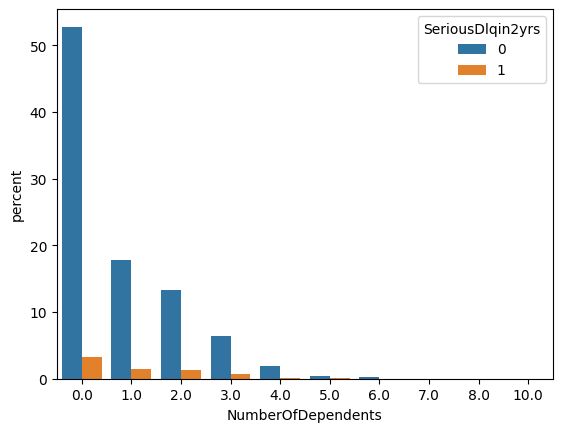

In [43]:
sns.countplot(df,x="NumberOfDependents", hue = target, stat= "percent")

<Axes: xlabel='NumberRealEstateLoansOrLines', ylabel='percent'>

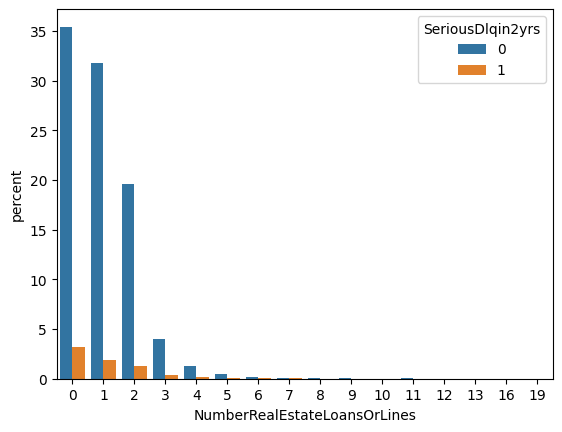

In [44]:
sns.countplot(df,x="NumberRealEstateLoansOrLines", hue = target, stat= "percent")

In [45]:
#Hay un error en estos datos, ya que van de 30 a 59 días y aparece en 98 que suponemos es el nueve. Lo tendríamos que consultar con negocio
#para corroborarlo, en este caso voy a asumir que fue un error y lo voy a cambiar
train_set[["NumberOfTime30-59DaysPastDueNotWorse"]].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0                                       8278
1                                       1090
2                                        320
3                                         99
4                                         50
5                                         18
98                                        16
6                                         15
7                                          1
8                                          1
Name: count, dtype: int64

In [46]:
#Nos pasa igual que con la otra columna así que asumiré el mismo error
train_set[["NumberOfTime60-89DaysPastDueNotWorse"]].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0                                       9377
1                                        396
2                                         69
3                                         16
98                                        16
4                                         11
5                                          2
11                                         1
Name: count, dtype: int64

In [47]:
train_set[["NumberOfTimes90DaysLate"]].value_counts()

NumberOfTimes90DaysLate
0                          9324
1                           331
2                           121
3                            43
4                            28
98                           16
5                            14
6                             4
7                             2
8                             2
9                             1
10                            1
13                            1
Name: count, dtype: int64

In [48]:
train_set['NumberOfTime60-89DaysPastDueNotWorse'] = train_set['NumberOfTime60-89DaysPastDueNotWorse'].replace(98, 9)

In [49]:
train_set["NumberOfTime30-59DaysPastDueNotWorse"] = train_set["NumberOfTime30-59DaysPastDueNotWorse"].replace(98, 9)

In [50]:
train_set[["NumberOfTime60-89DaysPastDueNotWorse"]].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0                                       9377
1                                        396
2                                         69
3                                         16
9                                         16
4                                         11
5                                          2
11                                         1
Name: count, dtype: int64

In [51]:
train_set[["NumberOfTime30-59DaysPastDueNotWorse"]].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0                                       8278
1                                       1090
2                                        320
3                                         99
4                                         50
5                                         18
9                                         16
6                                         15
7                                          1
8                                          1
Name: count, dtype: int64

<Axes: xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='Count'>

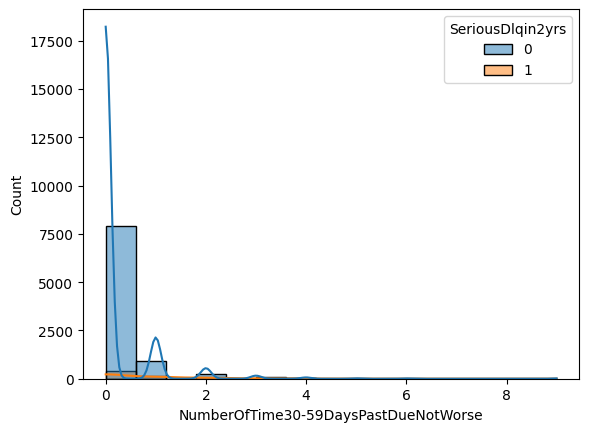

In [52]:
sns.histplot(train_set, x= "NumberOfTime30-59DaysPastDueNotWorse", kde= True, hue = target)

<Axes: xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='Count'>

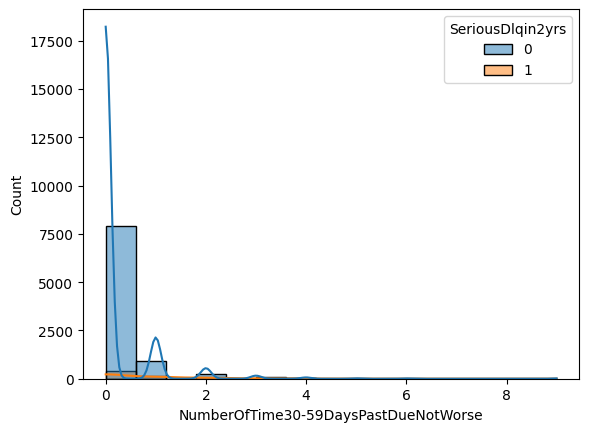

In [53]:
sns.histplot(train_set, x= "NumberOfTime30-59DaysPastDueNotWorse", kde= True, hue = target)

In [54]:
#Voy a hacerle todas las transformaciones a train_test 
test_set["MonthlyIncome"].fillna(media_monthly, inplace = True)
test_set['NumberOfTime60-89DaysPastDueNotWorse'] = test_set['NumberOfTime60-89DaysPastDueNotWorse'].replace(98, 9)
test_set["NumberOfTime30-59DaysPastDueNotWorse"] = test_set["NumberOfTime30-59DaysPastDueNotWorse"].replace(98, 9)

In [55]:
#Me creo los X,y de train y test sin escalar para hacer un Random Forest Classifier
X_train = train_set.drop(columns= target)
y_train = train_set[target]

X_test = test_set.drop(columns= target)
y_test = test_set[target]


In [56]:
# Escalo las features para hacer el KNN y una regresión logística
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= features_num)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = features_num)

In [57]:
model_names = ["Logistic Regression","KNeighbors", "Random Forest"]
lr_clf = LogisticRegression(max_iter = 10000)
knn = KNeighborsClassifier(n_neighbors= 5)
rf_clf = RandomForestClassifier(random_state= 42)

model_set = [lr_clf, knn, rf_clf]

In [58]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre == "Random Forest":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "balanced_accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
    
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(max_iter=10000)
KNeighborsClassifier()
RandomForestClassifier(random_state=42)


In [59]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Balanced Accuracy: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, Balanced Accuracy: 0.5445417301875312
Model <KNeighbors>, Balanced Accuracy: 0.5476415269652275
Model <Random Forest>, Balanced Accuracy: 0.5782715215949897
El ganador es Random Forest


In [73]:
param_grid = {"n_estimators": [300,500,700],
    "max_depth": [9,12],
    "min_samples_leaf": [20,40,60],
    "max_features": ["sqrt","log2"],
    "class_weight": ["balanced", None]
}

rf_grid = GridSearchCV(rf_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "balanced_accuracy",
                       n_jobs = -1)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [9, 12], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [20, 40, 60],
                         'n_estimators': [300, 500, 700]},
             scoring='balanced_accuracy')

In [74]:
print("Random_forest_score:", rf_grid.best_score_)
print("Random_forest_params:", rf_grid.best_params_)

Random_forest_score: 0.7716245786622986
Random_forest_params: {'class_weight': 'balanced', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 60, 'n_estimators': 700}


In [ ]:
print(classification_report(y_train, rf_grid.predict(X_train)))

- El recall medio es el 77%, mejoro mucho con los hiperparametros optimizados

In [75]:
y_pred = rf_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2311
           1       0.21      0.75      0.33       161

    accuracy                           0.80      2472
   macro avg       0.59      0.78      0.61      2472
weighted avg       0.93      0.80      0.85      2472



El recall medio, que es del 78% en este caso, indica que el modelo es bastante efectivo en la identificación de observaciones positivas en general. Sin embargo, es importante tener en cuenta que este valor es un promedio entre el recall de ambas clases. Dado que el recall para la clase 1 es considerablemente más bajo que para la clase 0 (75% frente a 80% respectivamente), la interpretación del recall medio debe considerar que el modelo puede tener dificultades para identificar correctamente las observaciones de la clase 1.

In [64]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [65]:
y_train_smote.value_counts()

SeriousDlqin2yrs
0    9188
1    9188
Name: count, dtype: int64

In [72]:
param_grid_smote = {"n_estimators": [200,300,500],
    "max_depth": [3,6,9],
    "min_samples_leaf": [10,20,40],
    "max_features": ["sqrt","log2"],
}
rf_smote= RandomForestClassifier(random_state=73)

rf_grid_smote = GridSearchCV(rf_smote,
                       param_grid= param_grid_smote,
                       cv = 5,
                       scoring = "balanced_accuracy",
                       n_jobs = -1)

rf_grid_smote.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=73), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [10, 20, 40],
                         'n_estimators': [200, 300, 500]},
             scoring='balanced_accuracy')

In [76]:
y_pred_smote= rf_grid_smote.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2311
           1       0.23      0.64      0.34       161

    accuracy                           0.84      2472
   macro avg       0.60      0.75      0.63      2472
weighted avg       0.92      0.84      0.87      2472



- No logramos mejor el recall medio y además predice peor la clase 1. 
- Finalmente vamos a observar la matriz de confusión de nuestro modelo ganador que es el rf_grid

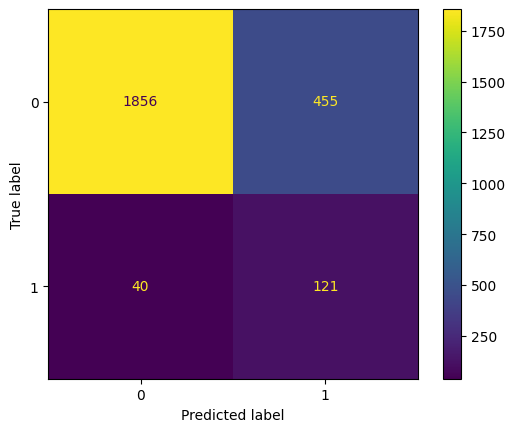

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

- El modelo predice muy bien la clase 0 pero no tanto la clase 1, de hecho se equivoca mucho al predicir la clase 1, sin embargo como negocio nos ha pedido el recall medio para ambas clases y eso lo hemos conseguido bastante bien